
 **Case study** : DQLab sport center is a store that sells various sports needs such as jackets, clothes, bags, and shoes. The store started selling since 2013, so it has had regular customers for a long time, and is still trying to get new customers until now.
 
 In early 2019, the store manager recruited a junior DA to help solve a problem that existed in his store, namely the decline in customers who bought back to his store.  The junior DA was also entrusted with processing the store's transaction data. 
 
 The store manager defined that a customer is no longer called a customer (churn) when he/she has not transacted at the store again up to the last 6 months from the last available data update.  The store manager also provided transaction data from 2013 to 2019 in csv (comma separated value) form with data_retail.csv with 100,000 rows of data.
 
 The fields in the data include:
 1. No
 2. Row_Num
 3. Customer_ID
 4. Product
 5. First_Transaction
 6. Last_Transaction
 7. Average_Transaction_Amount
 8. Count_Transaction

# 1. Import Library

In [50]:
import pandas as pd

retail = pd.read_csv('/kaggle/input/data-retail-sport/data_retail.csv', sep=';')

retail.head()


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [29]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


# 2. Data Cleansing

In [51]:
# First_Transaction column
retail['First_Transaction'] = pd.to_datetime(retail['First_Transaction']/1000, unit='s', origin='1970-01-01')

# Last_Transaction column
retail['Last_Transaction'] = pd.to_datetime(retail['Last_Transaction']/1000, unit='s', origin='1970-01-01')

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [53]:
# Classify customers who have churn status or not with booleans

retail.loc[retail['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
retail.loc[retail['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

retail.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [54]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


In [55]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert feature/column 'Month'
LE = LabelEncoder()
retail['is_churn'] = LE.fit_transform(retail['is_churn'])

print(LE.classes_)
print(np.sort(retail['is_churn'].unique()))
print('')

[False True]
[0 1]



In [34]:
# Delete columns that are not required

del retail['no']
del retail['Row_Num']

retail.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0


# 3. Data Visualization

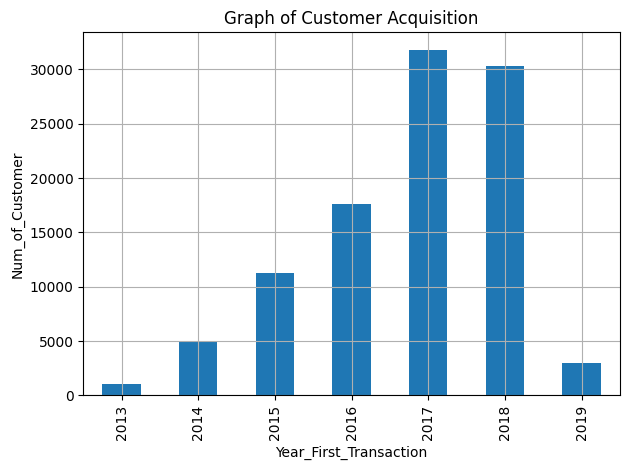

In [58]:
import matplotlib.pyplot as plt

# Customer acquisition by year

retail['Year_First_Transaction'] = retail['First_Transaction'].dt.year
retail['Year_Last_Transaction'] = retail['Last_Transaction'].dt.year

retail_year = retail.groupby(['Year_First_Transaction'])['Customer_ID'].count()

retail_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.grid(True)
plt.tight_layout()
plt.show()


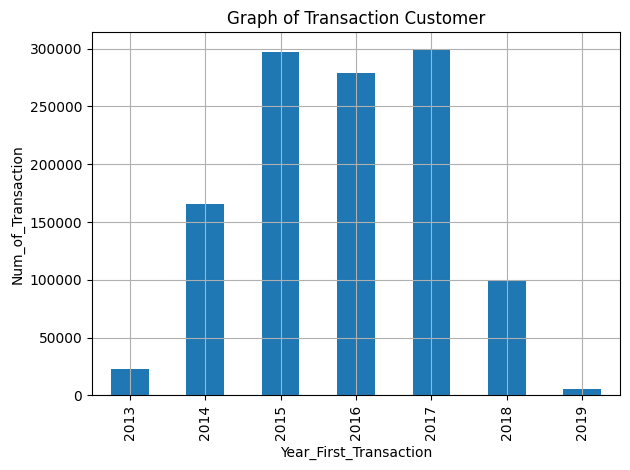

In [59]:
import matplotlib.pyplot as plt 

# Transaction by year
retail['Year_First_Transaction'] = retail['First_Transaction'].dt.year
retail['Year_Last_Transaction'] = retail['Last_Transaction'].dt.year

plt.clf()

retail_year = retail.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
retail_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.grid(True)
plt.tight_layout()
plt.show()


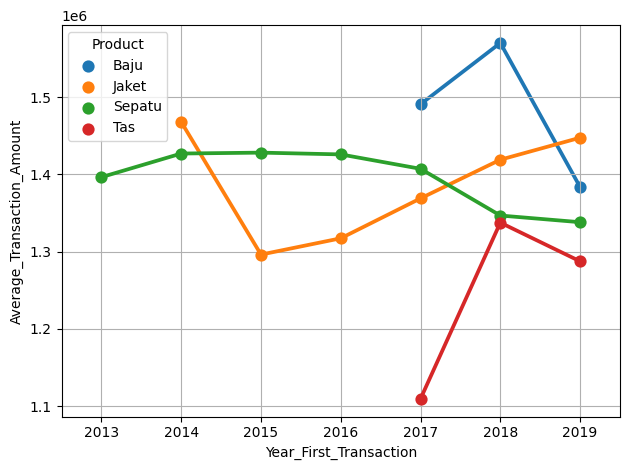

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Average Transaction by year
plt.clf()

sns.pointplot(data = retail.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.grid(True)
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

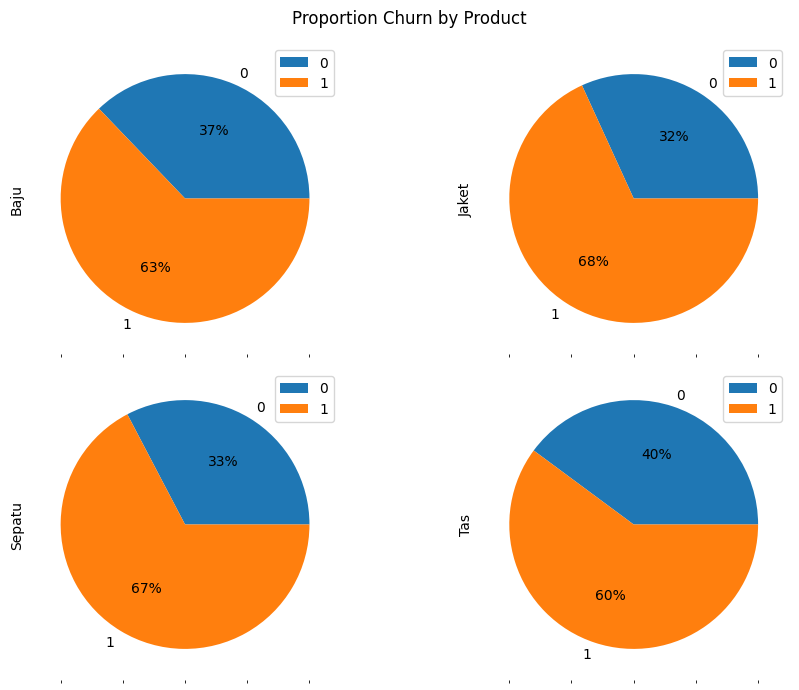

In [62]:
import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data dengan pivot_table
retail_piv = retail.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = retail_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
retail_piv = retail_piv.reindex(columns=plot_product)
retail_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()


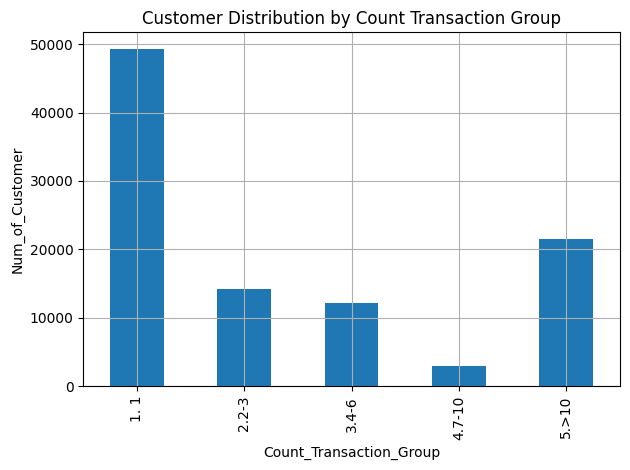

In [63]:
import matplotlib.pyplot as plt

plt.clf()
# Categorization of transaction amount
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction']> 6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val

# New column
retail['Count_Transaction_Group'] = retail.apply(func, axis=1)

retail_year = retail.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
retail_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.grid(True)
plt.tight_layout()
plt.show()


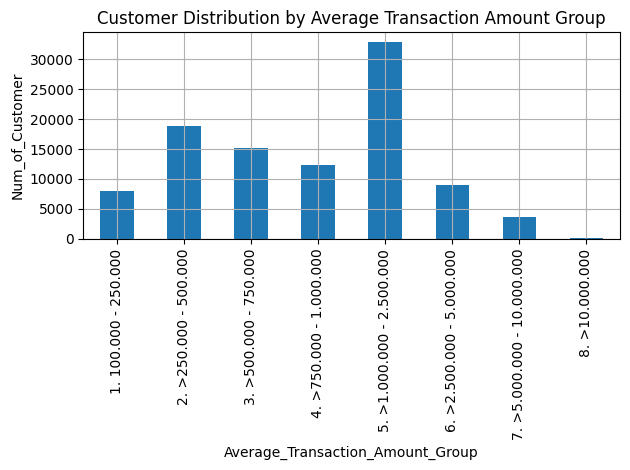

In [64]:
import matplotlib.pyplot as plt 

plt.clf()

# Categorization of transaction size averages
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# New column
retail['Average_Transaction_Amount_Group'] = retail.apply(f, axis=1)

retail_year = retail.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
retail_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Modelling

# Feature column: Year_Diff
retail['Year_Diff'] = retail['Year_Last_Transaction'] - retail['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
x = retail[feature_columns] 

# Target variable
y = retail['is_churn']

print('Feature Columns', x)
print('\nTarget Column',y)


Feature Columns        Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          2
1                         1269337                 41          4
2                          310915                 30          2
3                          722632                 27          2
4                         1775036                 25          3
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]

Target Column 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int64


In [66]:
# Split X and y into training and testing sections
# After the independent variable X and dependent variable y are completed, 
# then break X and y into the training and testing sections. 
# The testing part is 25% of the total data entries.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape


((75000, 3), (25000, 3))

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# logistic regression model initialization
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

# Predict model
y_pred = logreg.predict(x_test)

# Model evaluation using confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)


Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 640x480 with 0 Axes>

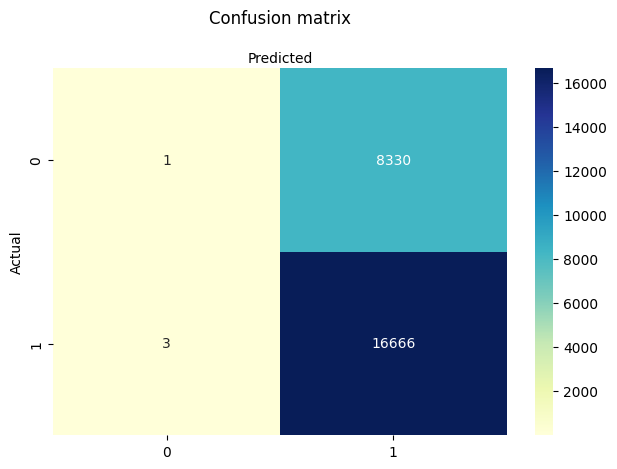

In [68]:
# Visualization of Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()

# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))


> Based on the model evaluation results above, it is found that accuracy, precision and recall have the same value, which is 66.668%. So, the model is good enough in classifying whether a customer churns or not based on the features used and the model is able to classify correctly by 66.668%.